Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL410250 / EEL7513 / EEL7514 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício 1: Introdução e Regressão Linear

Este é um exercício de introdução ao Python e bibliotecas básicas. Também serão abordados conceitos básicos de exploração de dados e regressão linear.

# Preparação / Revisão

- Ler Watt _(Machine Learning Refined)_ cap. 1
- Ler Watt apêndices A, B (de B.3 apenas os exemplos B.1.a e B.2.a) e D
- Ler e praticar os tutoriais:
 - Python (se necessário): https://docs.python.org/3/tutorial
 - NumPy: https://numpy.org/doc/stable/user/quickstart.html
 - Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
 - Pandas (opcional): https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- Revisar (caso necessário) conceitos básicos de probabilidade e estatística: variáveis aleatórias, distribuição/densidade de probabilidade, histograma, média, variância, correlação

In [1]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Manipulando arrays

1. Escreva uma função do Python que implementa a [similaridade do cosseno](https://en.wikipedia.org/wiki/Cosine_similarity) (eq. A.7 do Watt) entre dois vetores, definida por

$$
{\rm cosine\_similarity(\bx,\by)} = \frac{\bx^T \by}{\|\bx\|\|\by\|}
$$

In [2]:
def cosine_similarity(x,y):
    s = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return s

# Testes
x = np.array([1,2,3,4])
y = np.array([2,2,2,2])
z = np.array([2,-2,2,-2])
print(cosine_similarity(x,y)) # = 0.9128709291752769
print(cosine_similarity(x,z)) # = -0.18257418583505536

0.9128709291752769
-0.18257418583505536


### Dicas

- Use o operator @ (ver [documentação](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)) ao invés de `.dot()` para implementar  multiplicação matriz-matriz ou matriz-vetor, por exemplo: `C = A @ B`
- Funções úteis:

```python
np.linalg.norm()
```

2. Calcule os produtos $\bA^T\bB$ e $\bB \bA^T$, onde
$$\bA = \mat{1 & 2 \\ 3 & 4 \\ 5 & 6} \qquad \bB = \mat{1 & 1 \\ 1 & 1 \\ 1 & 1}$$

In [3]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[1,1],[1,1],[1,1]])
a = A.T

print(a @ B)
print(B @ a)

[[ 9  9]
 [12 12]]
[[ 3  7 11]
 [ 3  7 11]
 [ 3  7 11]]


3. Considere os vetores abaixo.

In [4]:
A = np.array([[1,0,1],[0,1,0],[1,1,1]])
A

array([[1, 0, 1],
       [0, 1, 0],
       [1, 1, 1]])

In [5]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [6]:
b*A

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

In [7]:
A*b

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

Explique o porquê do resultado abaixo.

In [8]:
np.all(b*A == A*b)

True

In [9]:
#pois o proprio python faz o broadcasting da matriz para realizar a operação

# 2. Manipulando dados

1. Baixe o arquivo `coin_Bitcoin.csv` (**terceiro** arquivo da lista em *Data Explorer*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o na mesma pasta deste notebook.

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2020 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o exemplo de uso do Pandas em https://github.com/dsevero/dsevero/blob/master/content/posts/pandas/tutorial.ipynb

In [10]:
df = pd.read_csv("coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

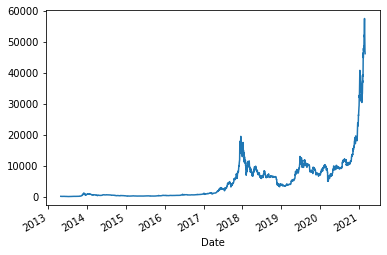

In [12]:
s = df.set_index('Date')['Close']
s.plot()

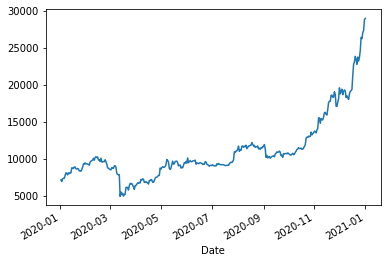

In [13]:
s['2020'].plot()

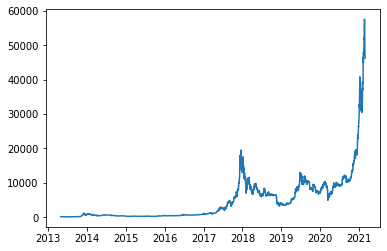

In [14]:
s.to_numpy()
plt.plot(s)

# 3. Análise de dados

Agora, veremos um exemplo de análise de dados usando um conjunto de dados do livro do James _(An Introduction to Statistical Learning)_.

Como descrito no Cap. 2, os dados consistem no total de vendas de um produto (em milhares de unidades), junto com seu orçamento de publicidade (em milhares de dólares) para três meios de comunicação diferentes (TV, rádio e jornal), em 200 localidades.

Carregue os dados usando o comando abaixo. Lembre que a variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [15]:
df = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)
df.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


1. Trace o histograma de cada variável (coluna), i.e., 4 no total. Para isso, utilize a função `plt.hist()`, com parâmetro `bins=30`.
1. Calcule a matriz de correlação entre as colunas. Dica: utilize a função `pd.DataFrame.corr()`
1. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um *scatter plot*, i.e., trace apenas os marcadores, não linhas.
1. O que você já pode afirmar sobre os dados a partir dessa análise exploratória?

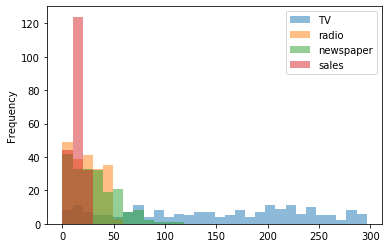

In [16]:
df.plot.hist(bins=30, alpha=0.5)

Text(0.5, 1.0, 'TV')

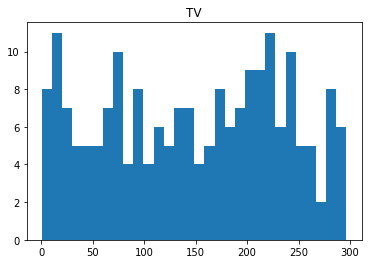

In [17]:
plt.hist(df['TV'], bins=30)
plt.title("TV")


Text(0.5, 1.0, 'radio')

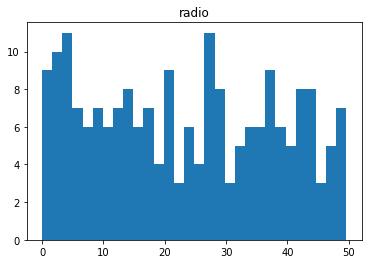

In [18]:
plt.hist(df['radio'], bins=30)
plt.title("radio")

Text(0.5, 1.0, 'newspaper')

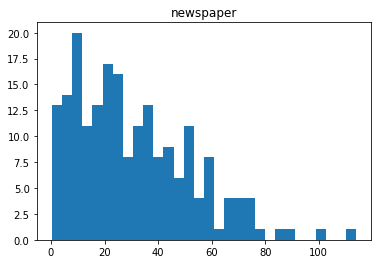

In [19]:
plt.hist(df['newspaper'], bins=30)
plt.title("newspaper")

Text(0.5, 1.0, 'sales')

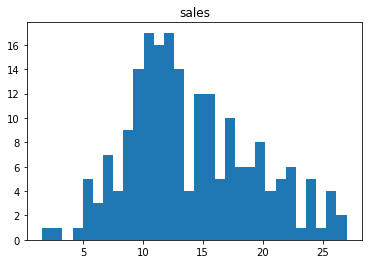

In [20]:
plt.hist(df['sales'], bins=30)
plt.title("sales")

In [21]:
pd.DataFrame.corr(df)

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


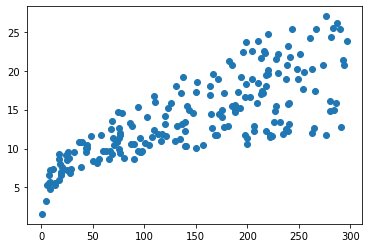

In [22]:
plt.scatter(df['TV'], df['sales'])

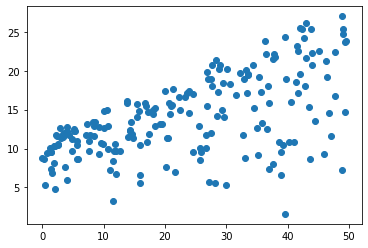

In [23]:
plt.scatter(df['radio'], df['sales'])

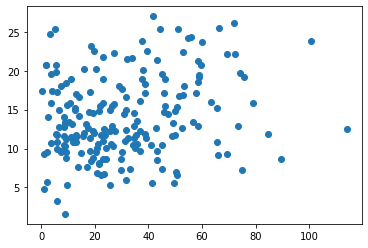

In [24]:
plt.scatter(df['newspaper'], df['sales'])

In [25]:
#Vemos que como visto usando a função de correlação, temos uma melhor correlação de TV com Vendas

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$. Dica: utilize a função do pandas `.to_numpy()`
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `train_test_split()` da biblioteca scikit-learn.

In [26]:
X = df[["TV",'radio','newspaper']].to_numpy()
y = df["sales"].to_numpy()
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


7. Treine um modelo de regressão linear sobre o **conjunto de treinamento**. Para isso, utilize a função `sklearn.linear_model.LinearRegression()` da biblioteca sklearn. 
1. Calcule a raiz do erro quadrático médio (RMSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste. Para isso, utilize a função `sklearn.metrics.mean_squared_error()` do sklearn.
1. (OPCIONAL) Encontre alguma forma de visualizar o modelo treinado ou suas predições.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
predictTrain = model.predict(X_train)
predictTest = model.predict(X_test)

trainRMSE = (np.sqrt(mean_squared_error(y_train, predictTrain)))
testRMSE = (np.sqrt(mean_squared_error(y_test ,predictTest)))
print('Train RMSE:', trainRMSE)
print('Test RMSE:', testRMSE)

Train RMSE: 1.5513912323520804
Test RMSE: 2.09812256349568


### Dicas

- Funções úteis
```python
pd.hist()
pd.DataFrame.corr()
pd.DataFrame.to_numpy()
sklearn.model_selection.train_test_split()
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
np.sqrt()
```
- Caso deseje uma referência, consulte o tutorial disponível em:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155. Note, porém, que não é necessário usar as funções da biblioteca `seaborn`.